In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
from sklearn.neighbors import KernelDensity

plt.ion()
plt.show()

def raw_data(path):
  data = pd.read_csv(path)
  return data.values

def truePDF(data, mu, cov, per):
    true_pdf = 0
    for i in range(len(mu)):
        true_pdf += (per[i] * multivariate_normal(mu[i], cov[i]).pdf(data))
    return true_pdf

In [2]:

mu = np.array([[2, 5],
               [8, 1],
               [5, 3]])
cov = np.array([[[2, 0], [0, 2]],
                  [[3, 1], [1, 3]],
                  [[2, 1], [1, 2]]])
per = [1/3,1/3,1/3]
data_2s = raw_data('dataset.csv')
data_2d = data_2s[:, :-1]
print("2D Data: \n", data_2d.shape)

x = np.linspace(np.amin(data_2d[:, 0]), np.amax(
    data_2d[:, 0]), 100).reshape(-1, 1)
y = np.linspace(np.amin(data_2d[:, 1]), np.amax(
    data_2d[:, 1]), 100).reshape(-1, 1)

xx, yy = np.meshgrid(x, y)
X_2d = np.concatenate(
    [xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)], axis=1)
print(X_2d.shape)


true_pdf = truePDF(X_2d,mu, cov, per)


2D Data: 
 (1500, 2)
(10000, 2)


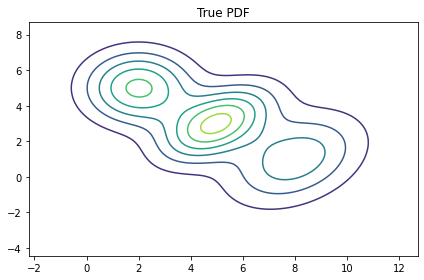

In [3]:
zz = np.array(true_pdf).reshape(xx.shape)

fig, ax = plt.subplots(1)
ax.contour(xx, yy, zz)
ax.set_title('True PDF')
fig.tight_layout()

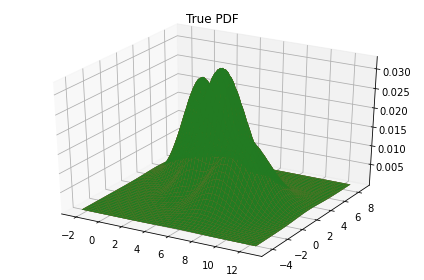

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(xx, yy, zz)
ax.set_title('True PDF')
fig.tight_layout()